# ISOMAP
## Qu'est ce que l'ISOMAP ?
  L’ISOMAP (Isometric Mapping) est une méthode de **réduction de dimension non linéaire**, en apprentissage automatique. Elle permet de transformer des données à haute dimension en un espace à faible dimension (**2D ou 3D**) tout en **préservant la structure géométrique globale des données**, pour que les données soient plus faciles à interpréter.  <br> <br>
  
  L'idée intuitive de l'ISOMAP est de **préserver les distances** géodésiques lors de la réduction de dimension, afin de **maintenir la similarité relative entre les points, tels qu'ils étaient dans l'espace de données d'origine**. Cette méthode permet de découvrir des structures sous-jacentes dans les données, d'**identifier des clusters** ou de visualiser des données complexes. Il est aussi utile pour **déplier des structures** comme les "swiss rolls" observables dans la partie programmation.
  
### Etapes de la réalisation :
#### Calcul de *D*, la matrice des distances
  Pour un exemple de données avec $n$ points, on calcule la matrice de distance géodésique $D$ de taille $n$ x $n$. Chaque élément $D_{i,j}$ représente la distance entre le point $i$ et $j$.   
  La distance géodésique entre deux points est la somme des poids des arêtes le long du chemin le plus court entre ces deux points.  
\begin{align*}
D_{i,j}^{geo} &= \sum_{k=1}^{N} d(v_k, v_{k+1}) \\
\end{align*}
 - $D_{i,j}^{geo}$ est la distance géodésique entre les points $x_i$ et $ x_j$.
 - $d(v_k, v_{k+1})$ est la distance euclidienne entre les points voisins $v_k $ et $v_{k+1}$ dans l'espace de données d'origine.
 - $N$ est le nombre d'arêtes (ou de points) dans le chemin le plus court entre  $x_i$ et $x_j$ dans le graphe de voisinage.  

  En l'occurence, pour la création de la matrice $D$, il n'y a qu'un seul saut pour arriver d'un point $i$ à un point $j$. La matrice obtenue est donc symétrique.  
  
#### Graphe de voisinage
  A partir de la matrice $D$, nous construisons un **graphe de voisinage**. En chaque point nous identifions ses $k$ **plus proches voisins** et nous connectons ces points dans le graphe. La longueur de chaque arête est égale à la distance euclidienne entre les deux points.  
  
#### Matrice *G* des distances le long des chemins les plus courts
  Ensuite, on utilise l’**algorithme de Dijkstra** ou l’algorithme de Floyd-Warshall pour **calculer les distances géodésiques** entre tous les points du graphe de voisinage.  
  Une nouvelle matrice $G$ est donc créée. Dans l'idée elle est la même que la matrice $D$ sauf que cette fois le chemin le plus court n'est pas une ligne droite car on passe par le graphe représenté précédemment (Si $D$ est une matrice de distances à vol d'oiseau, $G$ est une matrice des distances par la route).<br> <br>
  
  Nous allons **expliquer l'algorithme de Dijkstra**, dont la compréhension est assez évidente. A partir d'un tableau de distances, on fixe un **point de départ et un point d'arrivée**. On sélectionne le sommet non visité avec la plus petite distance et on le marque comme visité. Pour chaque voisin du chemin sélectionné, on calcule la distance en passant par le sommet sélectionné et on la compare à la distance actuelle. Si la nouvelle distance est plus petite on met à jour la disatnce. On répète donc ces étapes juqsu'à ce que le sommet d'arrivée soit atteint.  
(Voir exemple : https://commons.wikimedia.org/wiki/File:DijkstraBis01.svg?uselang=fr).
  
  
#### Réduction de dimension via MDS
  Enfin, on utilise la technique du **scaling multidimensionnel (MDS)** pour calculer l’**incorporation en dimension inférieure**.  
  La MDS est donc l'élément essentiel de la réduction de dimension, son objectif étant de bien placer les points de données dans l'espace de manière à ce que les distances entre les points sur le graphique correspondent le plus possible aux distances d'origine calculées.  <br><br>
  **Mathématiquement**, on peut décrire la MDS de cette manière :  
Calcul de la matrice de Gram ($B$) à partir de la matrice de distances :  
$$B = 0.5.(D^2)$$  
Transformation en double centrage de la matrice de Gram $B$ :  
$$C = I - 1/n.1.1^T.B.1.1^T$$  
- $C$ est la matrice de Gram centrée.  
- $I$ est la matrice centrée.  
- $n$ le nombre de points de données.  
- $1$ est une matrice composée de $1$ de taille $n$ x $n$.  

Calcul des vecteurs propres et des valeurs propres de la matrice de Gram centrée $C$.
Les vecteurs propres de $C$ sont les coordonnées des points de données dans l'espace de dimension réduite. <br><br>
#### Résultat :
  On obtient une réduction de dimension, de $n$ dimensions à deux ou trois dimensions. Le résultat obtenu est donc rapidement compréhensible et facile à interpréter.

## Programmation de l'algo ISOMAP en python
### Exemple : swiss roll

In [1]:
import numpy as np
import pandas as pd
import fnmatch, random
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.manifold import Isomap

#### Simulation d'un jeu de données de dimension 3

In [2]:
t = np.arange(0, 10, .005)
x0 = np.cos(t) * (t+1)
x1 = np.sin(t) * (t+1)
x2 = [20 * random. random() for x in x0]
x0 = np.array ([x0])
x1 = np.array([x1])
x2 = np.array ([x2])
x = np.concatenate([x0, x1, x2], axis=0).T

#### Affichage du dataset en forme de swiss roll

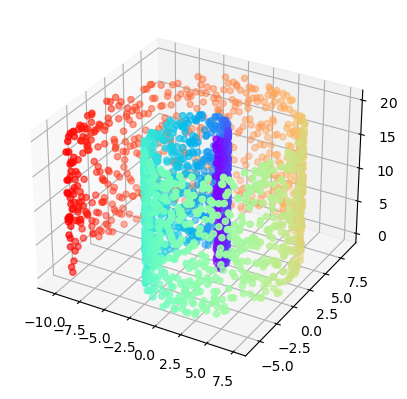

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection= '3d')
ax.scatter(x[:,0], x[:,1], x[:,2], c=t, cmap=plt.cm.rainbow)
plt.show()

#### Visualisation Isomap avec différents paramètres de voisinage

In [4]:
iso1 = Isomap(n_neighbors=2, n_components=2, eigen_solver='dense', n_jobs=-1)
iso1.fit(x)
y1=iso1.transform(x)

iso2 = Isomap(n_neighbors=10, n_components=2, eigen_solver='dense', n_jobs=-1)
iso2.fit(x)
y2=iso2.transform(x)

iso3 = Isomap(n_neighbors=50, n_components=2, eigen_solver='dense', n_jobs=-1)
iso3.fit(x)
y3=iso3.transform(x)

C:\Users\terna\anaconda3\Lib\site-packages\sklearn\manifold\_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 91 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\L

C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

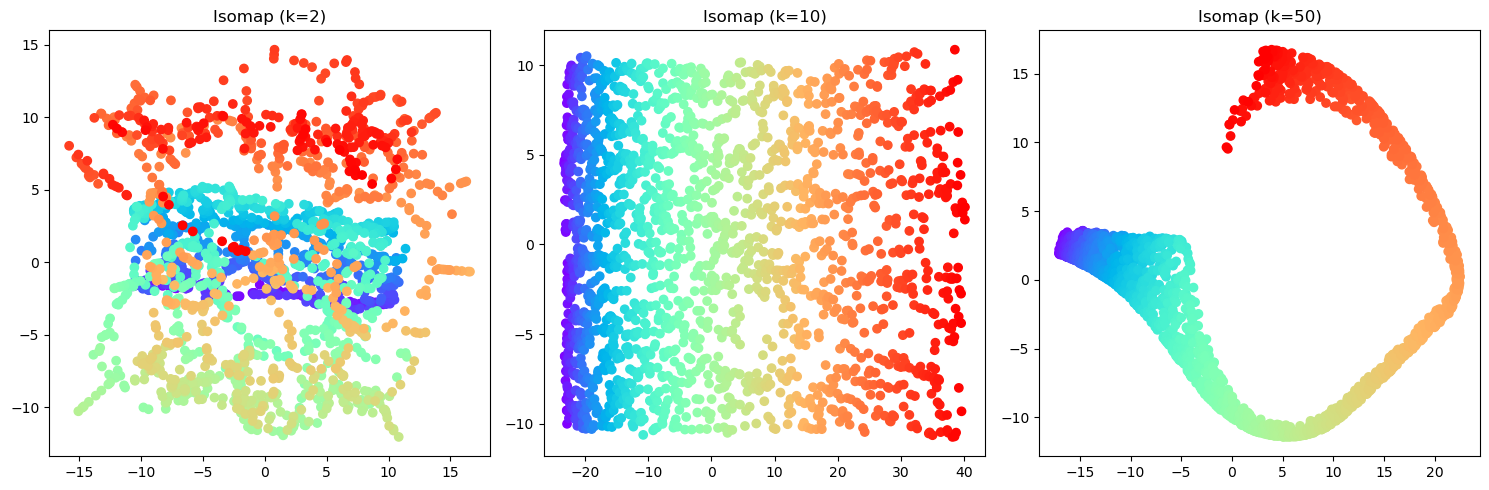

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(y1[:, 0], y1[:, 1], c=t, cmap=plt.cm.rainbow)
axs[0].set_title('Isomap (k=2)')

axs[1].scatter(y2[:, 0], y2[:, 1], c=t, cmap=plt.cm.rainbow)
axs[1].set_title('Isomap (k=10)')

axs[2].scatter(y3[:, 0], y3[:, 1], c=t, cmap=plt.cm.rainbow)
axs[2].set_title('Isomap (k=50)')

plt.tight_layout()

plt.show()

La déformation des graphiques pour k=2 et k=50 souligne l'importance de choisir soigneusement la valeur de k dans l'algo isomap.

### Application aux données de l'article

In [6]:
bondrate = pd.read_csv('data//bondrate.csv', header=None, sep=' ')
car = pd.read_csv('data//car.csv', header=None, sep=' ')
contact_lenses = pd.read_csv('data//contact-lenses.csv', header=None, sep=' ')
newthyroid = pd.read_csv('data//newthyroid.csv', header=None, sep=' ')
pasture = pd.read_csv('data//pasture.csv', header=None, sep=' ')
squash_stored = pd.read_csv('data//squash-stored.csv', header=None, sep=' ')

Données: bondrate 57 lignes


,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,735480.0,17642.0,49546.0,44655.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1
1,604816.0,15616.0,44052.0,39198.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
2,1002410.0,16471.0,61594.0,44022.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
3,2498016.0,16485.0,56542.0,47163.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
4,1481102.0,16663.0,54026.0,44394.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2


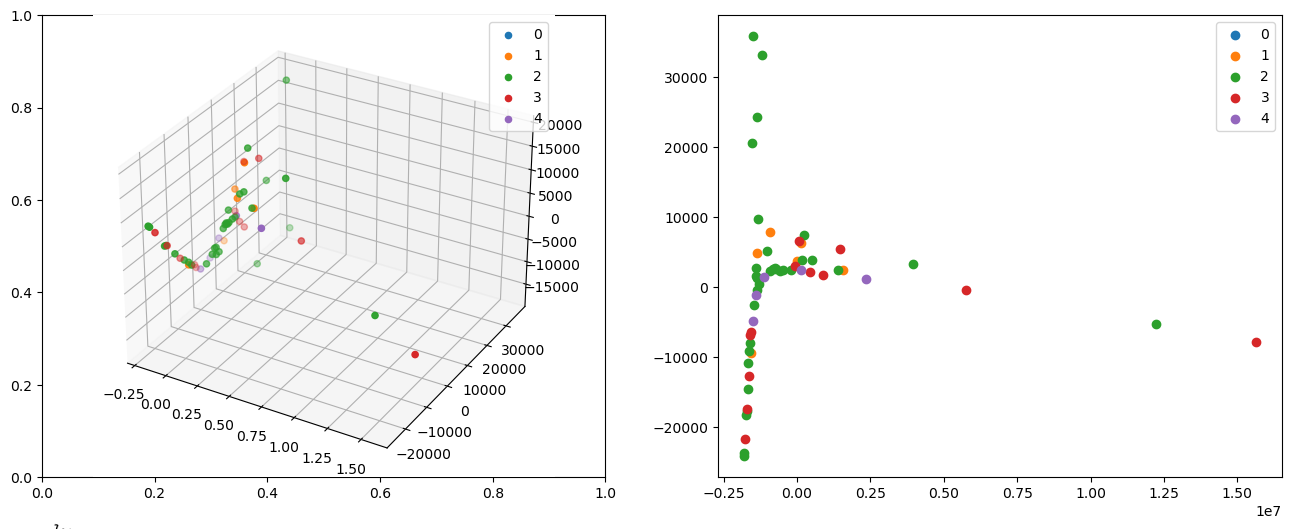

In [7]:
data = bondrate
long = len(data.columns)-1

nom_data = [nom for nom, var in locals().items() if var is data][0]
print('Données:',nom_data, len(data), 'lignes')

display(data.head(5))

y = pd.DataFrame(data[long]).iloc[:, 0]
data.drop(long, axis=1, inplace=True)
X = data

isomap_2d = Isomap(n_neighbors=5, n_components=2)
X_transformed_2d = isomap_2d.fit_transform(X)

isomap_3d = Isomap(n_neighbors=5, n_components=3)
X_transformed_3d = isomap_3d.fit_transform(X)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0] = fig.add_subplot(121, projection='3d')
for i in range(len(set(y))):
    axs[0].scatter(X_transformed_3d[y == i, 0], X_transformed_3d[y == i, 1], X_transformed_3d[y == i, 2], label=str(i))

axs[0].legend()

for i in range(len(set(y))):
    axs[1].scatter(X_transformed_2d[y == i, 0], X_transformed_2d[y == i, 1], label=str(i))

axs[1].legend()

plt.show()

Données: car 1728 lignes


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1


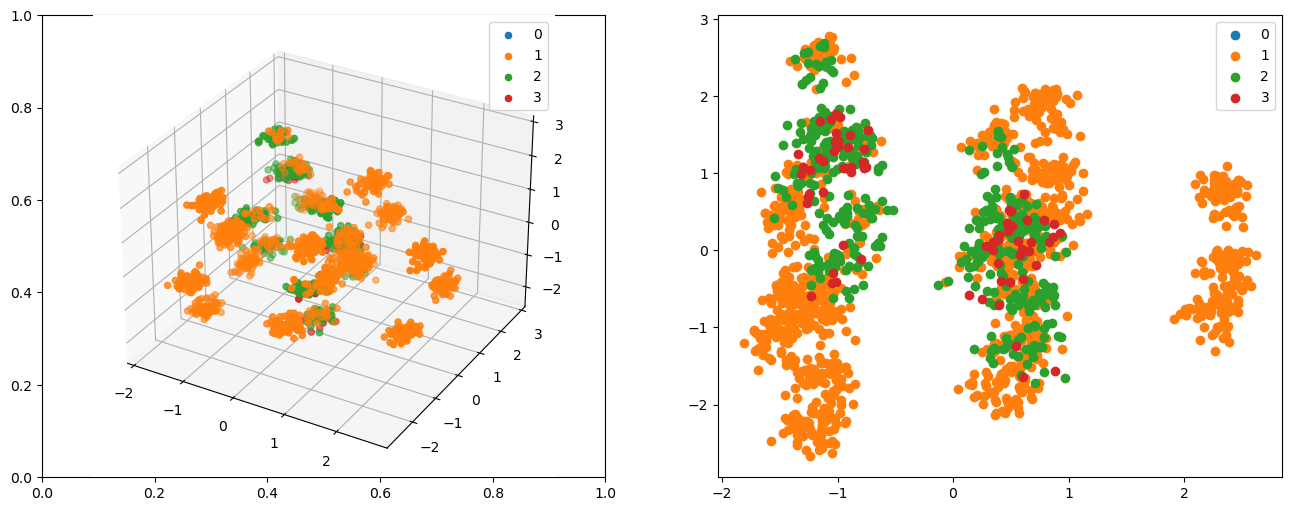

In [8]:
data = car
long = len(data.columns)-1
nom_data = [nom for nom, var in locals().items() if var is data][0]
print('Données:',nom_data, len(data), 'lignes')

display(data.head(5))

y = pd.DataFrame(data[long]).iloc[:, 0]
data.drop(long, axis=1, inplace=True)
X = data

isomap_2d = Isomap(n_neighbors=30, n_components=2)
X_transformed_2d = isomap_2d.fit_transform(X)

isomap_3d = Isomap(n_neighbors=30, n_components=3)
X_transformed_3d = isomap_3d.fit_transform(X)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0] = fig.add_subplot(121, projection='3d')
for i in range(len(set(y))):
    axs[0].scatter(X_transformed_3d[y == i, 0], X_transformed_3d[y == i, 1], X_transformed_3d[y == i, 2], label=str(i))

axs[0].legend()

for i in range(len(set(y))):
    axs[1].scatter(X_transformed_2d[y == i, 0], X_transformed_2d[y == i, 1], label=str(i))

axs[1].legend()

plt.show()

Données: newthyroid 215 lignes


,0,1,2,3,4,5
0,134.0,1.9,0.6,18.4,8.2,1
1,115.0,6.3,1.2,4.7,14.4,1
2,136.0,1.4,0.3,32.6,8.4,1
3,141.0,2.5,1.3,8.5,7.5,1
4,119.0,0.8,0.7,56.4,21.6,1


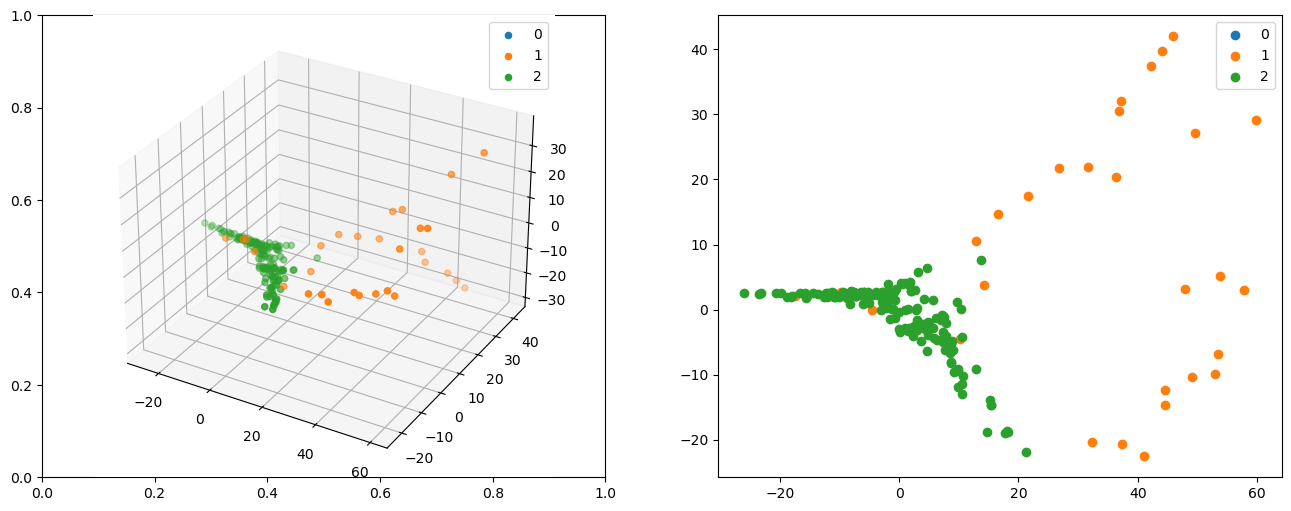

In [9]:
data = newthyroid
long = len(data.columns)-1
nom_data = [nom for nom, var in locals().items() if var is data][0]
print('Données:',nom_data, len(data), 'lignes')

display(data.head(5))

y = pd.DataFrame(data[long]).iloc[:, 0]
data.drop(long, axis=1, inplace=True)
X = data

isomap_2d = Isomap(n_neighbors=5, n_components=2)
X_transformed_2d = isomap_2d.fit_transform(X)

isomap_3d = Isomap(n_neighbors=5, n_components=3)
X_transformed_3d = isomap_3d.fit_transform(X)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0] = fig.add_subplot(121, projection='3d')
for i in range(len(set(y))):
    axs[0].scatter(X_transformed_3d[y == i, 0], X_transformed_3d[y == i, 1], X_transformed_3d[y == i, 2], label=str(i))

axs[0].legend()

for i in range(len(set(y))):
    axs[1].scatter(X_transformed_2d[y == i, 0], X_transformed_2d[y == i, 1], label=str(i))

axs[1].legend()

plt.show()

Données: pasture 36 lignes


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,1.0,0.0,0.0,9.0,92.0,8.0,314.0,480.0,2.72,...,0.0,0.171,9.56,111.5,17.50,35.8,734.2,192.4,1575.0,1
1,0.0,0.0,1.0,0.0,18.0,93.0,8.0,206.0,375.0,4.76,...,0.0,0.168,8.25,102.0,10.89,32.1,778.7,201.2,1509.0,1
2,0.0,1.0,0.0,0.0,23.0,148.0,5.0,258.0,405.0,4.00,...,0.0,0.146,6.52,79.6,18.03,34.4,727.4,145.7,1554.0,1
3,1.0,0.0,0.0,0.0,25.0,37.0,8.0,235.0,235.0,3.64,...,0.0,0.188,2.63,298.3,8.63,19.7,615.7,269.3,1335.0,2
4,1.0,0.0,0.0,0.0,17.0,112.0,10.0,310.0,475.0,3.80,...,0.0,0.143,10.01,102.2,10.47,39.3,893.5,91.9,2157.0,2


C:\Users\terna\anaconda3\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\terna\anaconda3\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\terna\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set

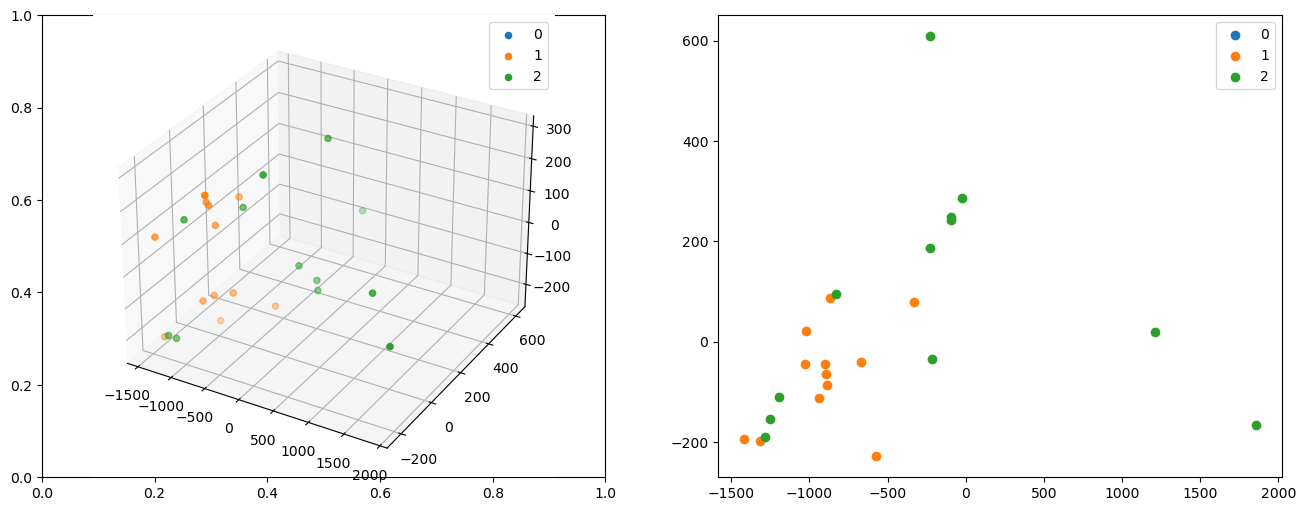

In [10]:
data = pasture
long = len(data.columns)-1
nom_data = [nom for nom, var in locals().items() if var is data][0]
print('Données:',nom_data, len(data), 'lignes')

display(data.head(5))

y = pd.DataFrame(data[long]).iloc[:, 0]
data.drop(long, axis=1, inplace=True)
X = data

isomap_2d = Isomap(n_neighbors=5, n_components=2)
X_transformed_2d = isomap_2d.fit_transform(X)

isomap_3d = Isomap(n_neighbors=5, n_components=3)
X_transformed_3d = isomap_3d.fit_transform(X)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0] = fig.add_subplot(121, projection='3d')
for i in range(len(set(y))):
    axs[0].scatter(X_transformed_3d[y == i, 0], X_transformed_3d[y == i, 1], X_transformed_3d[y == i, 2], label=str(i))

axs[0].legend()

for i in range(len(set(y))):
    axs[1].scatter(X_transformed_2d[y == i, 0], X_transformed_2d[y == i, 1], label=str(i))

axs[1].legend()

plt.show()

Données: contact_lenses 24 lignes


,0,1,2,3,4,5,6
0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,0.0,1.0,0.0,1.0,1.0,1.0,1
2,0.0,1.0,0.0,0.0,1.0,0.0,1
3,0.0,0.0,1.0,1.0,0.0,0.0,1
4,1.0,0.0,0.0,0.0,0.0,1.0,2


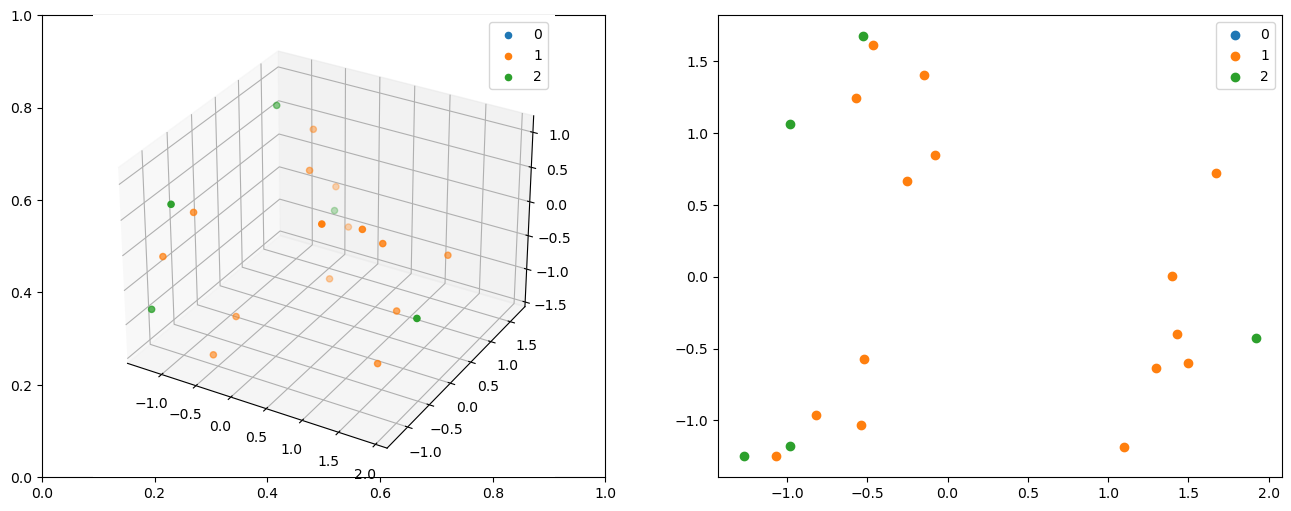

In [11]:
data = contact_lenses
long = len(data.columns)-1
nom_data = [nom for nom, var in locals().items() if var is data][0]
print('Données:',nom_data, len(data), 'lignes')

display(data.head(5))

y = pd.DataFrame(data[long]).iloc[:, 0]
data.drop(long, axis=1, inplace=True)
X = data

isomap_2d = Isomap(n_neighbors=5, n_components=2)
X_transformed_2d = isomap_2d.fit_transform(X)

isomap_3d = Isomap(n_neighbors=5, n_components=3)
X_transformed_3d = isomap_3d.fit_transform(X)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0] = fig.add_subplot(121, projection='3d')
for i in range(len(set(y))):
    axs[0].scatter(X_transformed_3d[y == i, 0], X_transformed_3d[y == i, 1], X_transformed_3d[y == i, 2], label=str(i))

axs[0].legend()

for i in range(len(set(y))):
    axs[1].scatter(X_transformed_2d[y == i, 0], X_transformed_2d[y == i, 1], label=str(i))

axs[1].legend()

plt.show()

Données: squash_stored 52 lignes


,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,64.50,26.85,86.78,876.4,880.9,687.8,325.8,1023.0,738.0,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,59.61,26.52,66.91,617.3,781.6,434.4,68.2,923.0,572.0,1
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,58.59,39.37,58.45,319.6,415.8,272.1,201.2,822.0,436.0,1
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,57.65,37.64,92.77,667.0,748.6,610.1,376.9,847.0,458.0,1
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,61.56,24.65,40.86,853.0,934.5,631.0,109.6,905.0,564.0,1


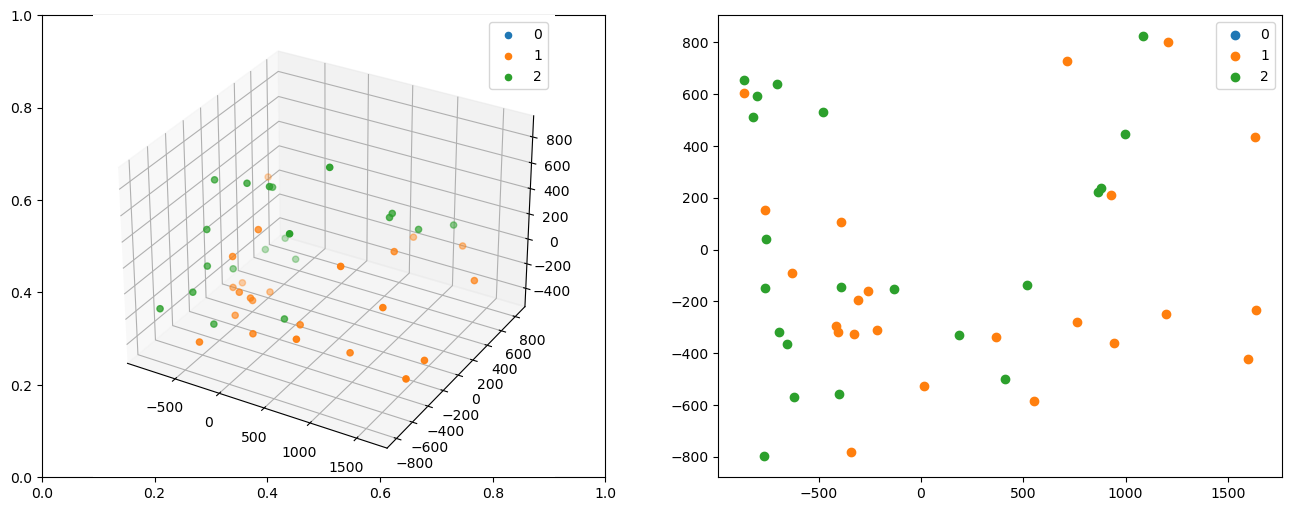

In [12]:
data = squash_stored
long = len(data.columns)-1
nom_data = [nom for nom, var in locals().items() if var is data][0]
print('Données:',nom_data, len(data), 'lignes')

display(data.head(5))

y = pd.DataFrame(data[long]).iloc[:, 0]
data.drop(long, axis=1, inplace=True)
X = data

isomap_2d = Isomap(n_neighbors=5, n_components=2)
X_transformed_2d = isomap_2d.fit_transform(X)

isomap_3d = Isomap(n_neighbors=5, n_components=3)
X_transformed_3d = isomap_3d.fit_transform(X)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0] = fig.add_subplot(121, projection='3d')
for i in range(len(set(y))):
    axs[0].scatter(X_transformed_3d[y == i, 0], X_transformed_3d[y == i, 1], X_transformed_3d[y == i, 2], label=str(i))

axs[0].legend()

for i in range(len(set(y))):
    axs[1].scatter(X_transformed_2d[y == i, 0], X_transformed_2d[y == i, 1], label=str(i))

axs[1].legend()

plt.show()

On constate donc que la méthode ISOMAP n'est pas adaptée à ces datasets étant donné qu'ils sont composés de données ordinales.

## Conclusion
### Point positifs
- L'ISOMAP fonctionne bien sur des données avec une **structure géométrique complexe sous-jacente**, ou avec des données non linéaires, car il a été conçu pour.
- On obtient des **résultats très visuels**.
- Se concentre sur la **structure globale** des données plus que sur les détails.
- Les types de données qu'il peut être pertinent d'étudier avec ISOMAP sont les données **géospatiales**, **biomédicales** ou le **traitement d'images** entre autres.

### Limites
- ISOMAP **repose sur la notion de distances**, donc les **données ordinales ne sont pas adaptées** (pas de distances entre 'oui' et 'non', ou encore entre 'insatisfait', 'neutre' et 'satisfait' par exemple.)
- En très grande dimension, l'ISOMAP est **très couteux en temps et en calcul** à cause des calculs de distances géodésiques.
- Le choix du **nombre de k-voisins est très important**, l'algorithme est très sensible aux variations de paramètres.
- Le stockage des données géodésiques nécessite une quantité significative de mémoire.


#### Sources :
- https://en.wikipedia.org/wiki/Isomap
- https://openclassrooms.com/fr/courses/4379436-explorez-vos-donnees-avec-des--algorithmes-non-supervises/4379526-decouvrez-une-variete-qui-conserve-la-structure-globale
- https://fr.wikipedia.org/wiki/Algorithme_de_Dijkstra
- https://web.archive.org/web/20040411051530/http://isomap.stanford.edu/
- https://irma.math.unistra.fr/~franck/cours/SciML/output/html/chapANS_sec3.html
- https://www.youtube.com/watch?v=Xu_3NnkAI9s
- https://www.youtube.com/watch?v=PNcxAbZX5X0